# Internship Number - DS2312

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('medical_cost_insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:xlabel='charges', ylabel='Density'>

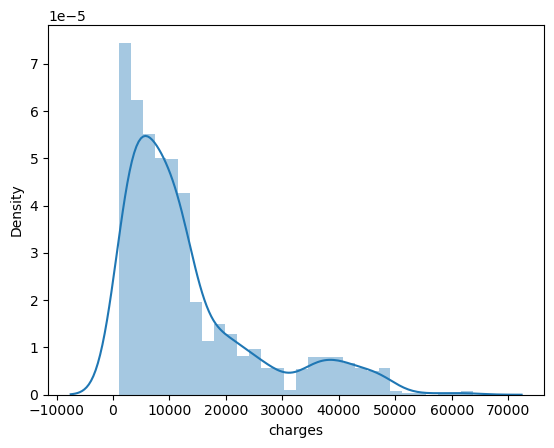

In [6]:
sns.distplot(df['charges'])

In [7]:
df['smoker'] = df['smoker'].replace('no',0)
df['smoker'] = df['smoker'].replace('yes',1)

In [8]:
df['sex'] = df['smoker'].replace('female',0)
df['sex'] = df['smoker'].replace('male',1)

In [9]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


<AxesSubplot:>

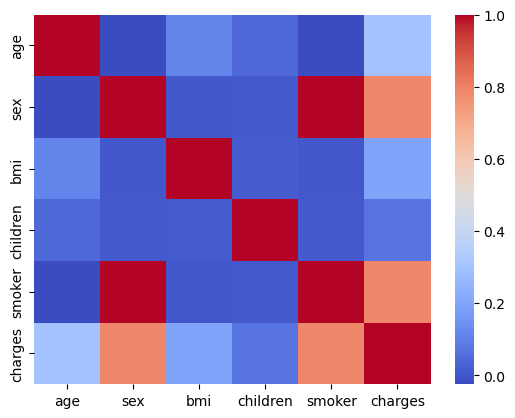

In [10]:
sns.heatmap(df.corr(), cmap='coolwarm')

<AxesSubplot:>

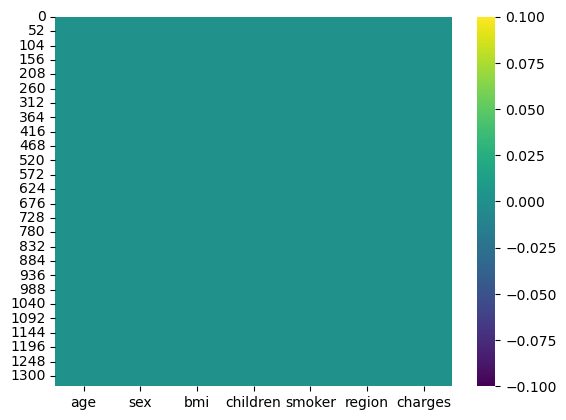

In [11]:
sns.heatmap(df.isna(),cmap='viridis')

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    df[i] = le.fit_transform(df[i])

In [18]:
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,1,0,269,0,0,1,41
581,1,0,269,0,0,1,41


In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df

,age,sex,bmi,children,smoker,region,charges
0,1,1,197,0,1,3,1005
1,0,0,350,1,0,2,57
2,10,0,331,3,0,2,306
3,15,0,73,0,0,1,1097
4,14,0,223,0,0,1,254
...,...,...,...,...,...,...,...
1333,32,0,276,3,0,1,746
1334,0,0,302,0,0,0,118
1335,0,0,422,0,0,2,32
1336,3,0,146,0,0,3,91


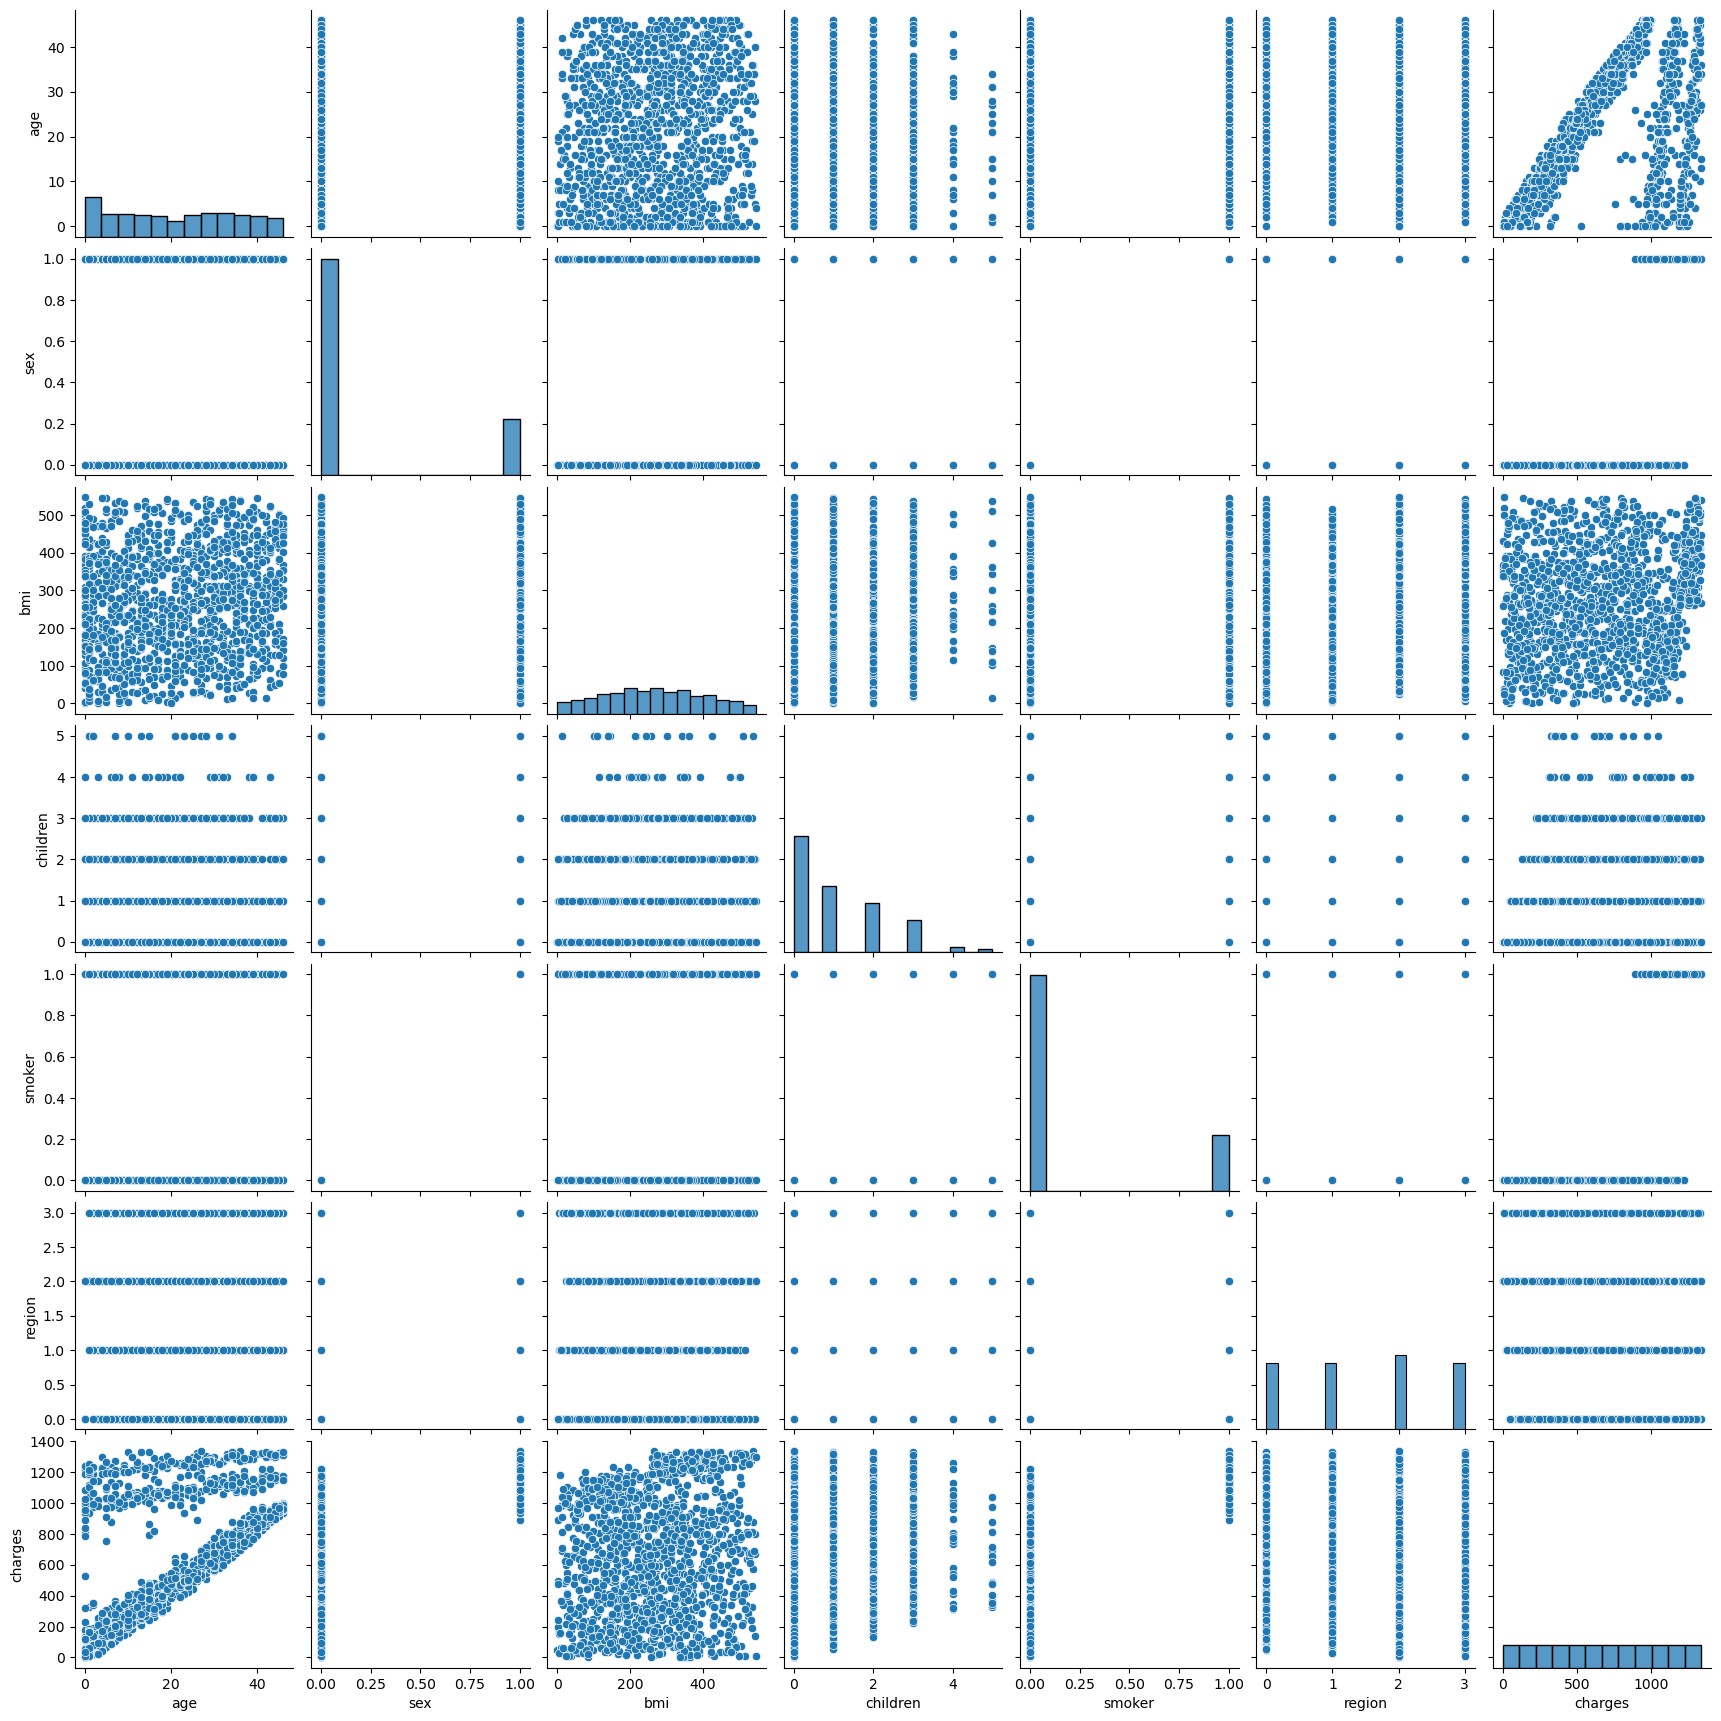

In [21]:
sns.pairplot(df)

In [25]:
x = df.drop(['charges'],axis=1)
y = df.charges

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

<AxesSubplot:ylabel='bmi'>

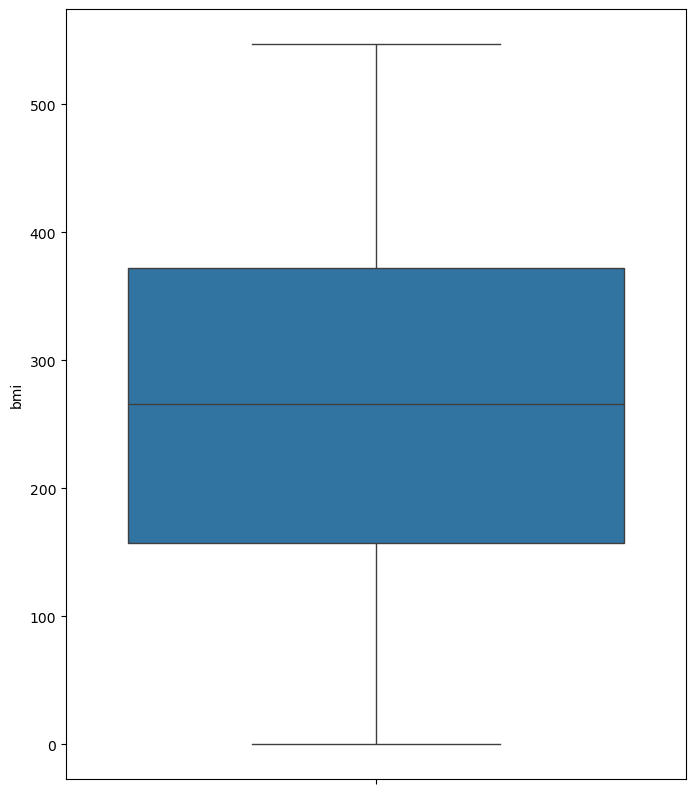

In [29]:
plt.figure(figsize=(8,10))
sns.boxplot(df['bmi'])

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=12)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [34]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
y_pred_train = lr.predict(x_train)

print('R_test:',r2_score(y_test, y_pred))
print('R_train:',r2_score(y_train, y_pred_train))
print('MAE:',mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))

R_test: 0.7534296809850993
R_train: 0.7607171529314474
MAE: 128.0747849400995
MSE: 36576.84284433014
RMSE: 191.25073292494892


In [35]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
y_pred_train = dt.predict(x_train)

print('R_test:',r2_score(y_test, y_pred))
print('R_train:',r2_score(y_train, y_pred_train))
print('MAE:',mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))

R_test: 0.6112261430745409
R_train: 0.9940150573311364
MAE: 112.3910447761194
MSE: 57671.662686567164
RMSE: 240.14925085572756


In [36]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
y_pred_train = rf.predict(x_train)

print('R_test:',r2_score(y_test, y_pred))
print('R_train:',r2_score(y_train, y_pred_train))
print('MAE:',mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))

R_test: 0.8135428733779394
R_train: 0.9640650108794757
MAE: 89.78835323383085
MSE: 27659.505186625207
RMSE: 166.3114704000455


In [37]:
knn = KNN()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
y_pred_train = knn.predict(x_train)

print('R_test:',r2_score(y_test, y_pred))
print('R_train:',r2_score(y_train, y_pred_train))
print('MAE:',mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))

R_test: 0.7983082762169941
R_train: 0.8516881335511888
MAE: 98.61791044776119
MSE: 29919.44250746268
RMSE: 172.97237498358714


In [38]:
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
y_pred_train = gb.predict(x_train)

print('R_test:',r2_score(y_test, y_pred))
print('R_train:',r2_score(y_train, y_pred_train))
print('MAE:',mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))

R_test: 0.8083088667325173
R_train: 0.8712248380198906
MAE: 91.29870411686245
MSE: 28435.93050529551
RMSE: 168.62956592868142


In [40]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=1000, normalize=True )
lassocv.fit(x_train,y_train)

LassoCV(cv=10, normalize=True)

In [41]:
apl = lassocv.alpha_
apl

0.008066078975135617

In [42]:
lass = Lasso(apl)
lass.fit(x_train,y_train)

Lasso(alpha=0.008066078975135617)

In [43]:
y_pred_las = lass.predict(x_test)
y_pred_train_las = lass.predict(x_train)

print('R_test:',r2_score(y_test, y_pred_las))
print('R_train:',r2_score(y_train, y_pred_train_las))
print('MAE:',mean_absolute_error(y_test, y_pred_las))
print('MSE:', mean_squared_error(y_test, y_pred_las))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_las)))

R_test: 0.7534161493575116
R_train: 0.7607171284293228
MAE: 128.0832828775133
MSE: 36578.85015898863
RMSE: 191.25598071429982


In [44]:
from sklearn.model_selection import cross_val_score

In [47]:
lr_score = cross_val_score(lr,x,y,cv=10)
print(lr_score)
print('-'*50)
print('Linear Regression:',lr_score.mean())

[0.81681711 0.78724833 0.654721   0.68144867 0.80561384 0.85578679
 0.83875164 0.68609419 0.63819745 0.77775815]
--------------------------------------------------
Linear Regression: 0.754243716916494


In [48]:
score_dt = cross_val_score(dt,x,y,cv=10)
print(score_dt)
print('-'*50)
print('Decision Tree',score_dt.mean())

[0.70938627 0.62928846 0.50000364 0.43458027 0.63236277 0.7108721
 0.53278644 0.67197562 0.5585226  0.64049175]
--------------------------------------------------
Decision Tree 0.6020269924189738


In [49]:
score_rf = cross_val_score(rf,x,y,cv=10)
print(score_rf)
print('-'*50)
print('Random Forest',score_rf.mean())

[0.84009493 0.81196612 0.64824062 0.67499195 0.7927296  0.89366541
 0.81419188 0.75983263 0.71671217 0.84721487]
--------------------------------------------------
Random Forest 0.7799640172853977


In [50]:
score_gb = cross_val_score(gb,x,y,cv=10)
print(score_gb)
print('-'*50)
print('Grad Boost',score_gb.mean())

[0.88176232 0.84904104 0.69615878 0.72437788 0.84972445 0.91076196
 0.88034787 0.74674122 0.69792851 0.84237616]
--------------------------------------------------
Grad Boost 0.8079220180774129


In [51]:
score_knn = cross_val_score(knn,x,y,cv=10)
print(score_knn)
print('-'*50)
print('KNN:',score_knn.mean())

[ 0.32634457  0.13918111  0.19087573  0.12053402  0.20338025  0.07198433
  0.26360319  0.11235049 -0.06831666  0.04456486]
--------------------------------------------------
KNN: 0.14045019102669648


In [52]:
score_las = cross_val_score(lass,x,y,cv=10)
print(score_las)
print('-'*50)
print('Lasso CV:',score_las.mean())

[0.81681589 0.78724716 0.65473265 0.68145495 0.80561137 0.85577754
 0.83875441 0.68609404 0.63819448 0.77775468]
--------------------------------------------------
Lasso CV: 0.7542437161990612


Gradient Boost gives an accuracy score of 0.80